In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv("Bank_Marketing_Original_Data.csv")
df.head()


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,contact,Day,Month,Duration,Campaign,Pdays,Previous,poutcome,TARGET
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


TARGET
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


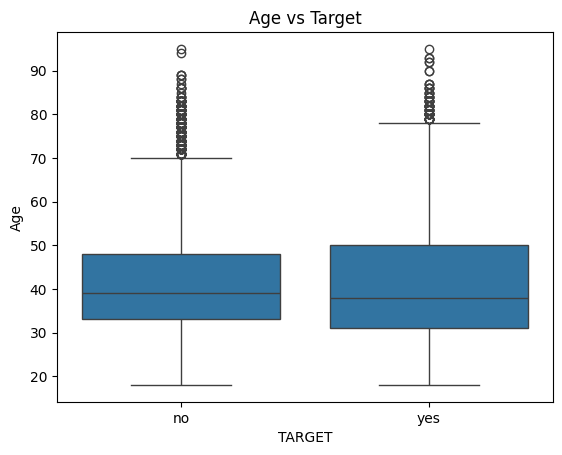

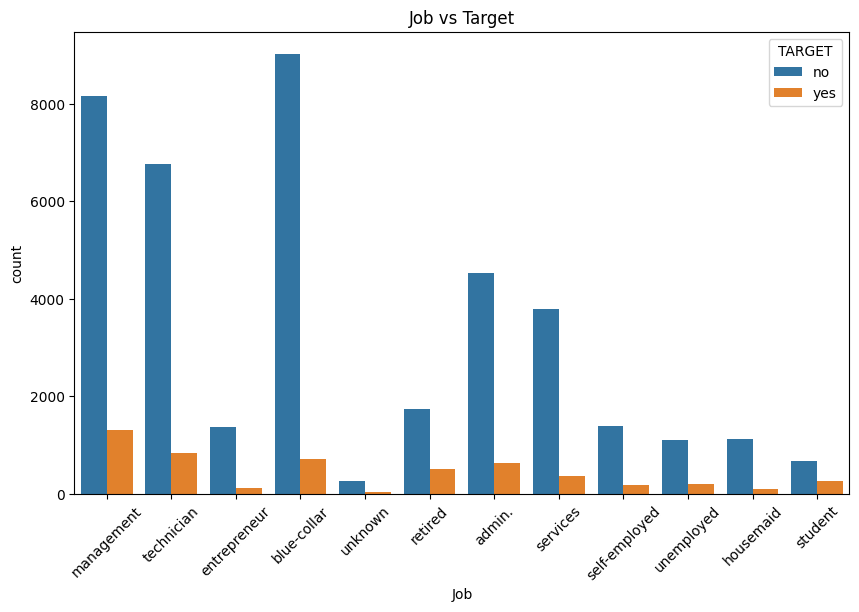

In [15]:

print(df['TARGET'].value_counts(normalize=True))

sns.boxplot(x='TARGET', y='Age', data=df)
plt.title('Age vs Target')
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Job', hue='TARGET')
plt.xticks(rotation=45)
plt.title('Job vs Target')
plt.show()


In [12]:
X = df.drop('TARGET', axis=1)
y = df['TARGET'].map({'yes': 1, 'no': 0})

# Identify categorical and numerical
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Final pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.41      0.51      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.89      0.91      0.89      9043

ROC AUC Score: 0.93


In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Re-sample training data
smote = SMOTE(random_state=42)

model_improved = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_improved.fit(X_train, y_train)
y_pred2 = model_improved.predict(X_test)
y_prob2 = model_improved.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred2))
print(f"Improved ROC AUC: {roc_auc_score(y_test, y_prob2):.2f}")


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.65      0.43      0.52      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043

Improved ROC AUC: 0.92
